# Web Scraping

## Objetivo

Nosso objetivo é encontrar algum site para ~~roubarmos~~ extrairmos informações e criarmos um banco de dados. *(com muito respeito)*

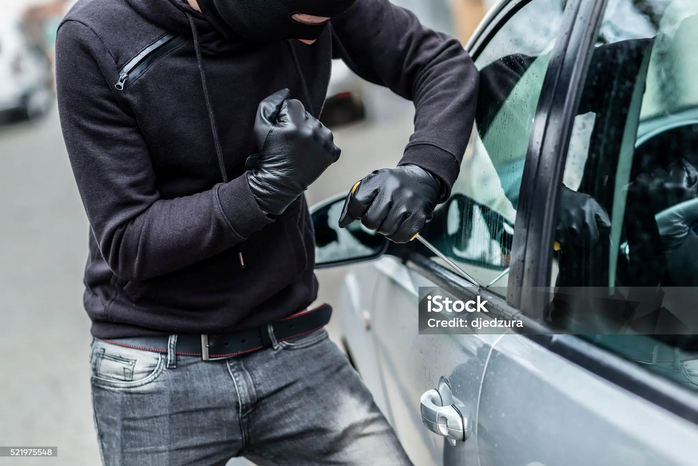

## Encontra a Vítima Perfeita

Nossa principal ferramenta nesse momento é o **"Ver Código Fonte"** do navegador.

### Sites Difíceis
- **Javascript na página** ([UOL Política](https://noticias.uol.com.br/politica/))
- **Páginas com "ver mais"** ([G1 Política](https://g1.globo.com/politica/))

Para lidar com esses casos, precisamos usar uma ferramenta chamada **Selenium**.

### Sites Fáceis
- **Páginas em HTML simples** ou com **URL editável** ([Senado Notícias](https://www12.senado.leg.br/noticias/temas/politica/pagina/1))

**Encontramos nossa vítima!**


## Arma do crime

#### **`requests`**
- Biblioteca utilizada para **fazer requisições HTTP**.
- Permite acessar páginas web e obter o conteúdo delas, como HTML, JSON ou arquivos de texto.
- Fundamental para capturar o código-fonte de uma página para análise.

#### **`BeautifulSoup`** (do pacote `bs4`)
- Biblioteca usada para **analisar e manipular documentos HTML ou XML**.
- Facilita a extração de informações específicas, como títulos, links ou tabelas, a partir do conteúdo HTML obtido.

### Fluxo básico:
1. Utilize `requests` para fazer a requisição e capturar o conteúdo HTML da página.
2. Use `BeautifulSoup` para analisar o HTML e extrair os dados que deseja.


##  Capturando o HTML da Vítima

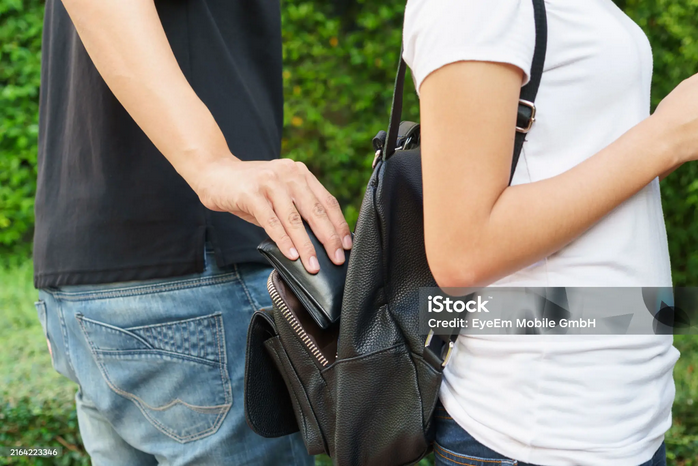

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# URL da vítima
url = "https://www12.senado.leg.br/noticias/temas/politica/pagina/"

# Cabeçalho para simular um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

In [3]:
response = requests.get(url, headers=headers)
response
# <Response [200]> -> requisição foi bem-sucedida 

<Response [200]>

In [4]:
soup = BeautifulSoup(response.text, "html.parser")

In [5]:
soup


<!DOCTYPE html>

<html lang="pt-br">
<head>
<link href="https://www12.senado.leg.br/noticias/temas/politica/pagina" rel="canonical"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="pt_BR" property="og:locale">
<meta content="Senado Federal" property="og:site_name">
<!-- HTML5 shim and Respond.js IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
      <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
      <script src="https://oss.maxcdn.com/libs/respond.js/1.3.0/respond.min.js"></script>
    <![endif]-->
<title>Política — Senado Notícias</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<script>PORTAL_URL = 'https://www12.senado.leg.br/noticias';</script>
<script data-bundle="production" src="https://www12.senado.leg.br/noticias/++plone++production/++unique++2024-11-18T09:28:36.845438/default.js" type="text/javascript"></script>
<script data-bundle="senado_no

In [6]:
# Exibe o html como texto
print(soup.get_text())












Política — Senado Notícias



























Ir para conteúdo principal








 Menu












Acessibilidade
Fale com o Senado



Fale com o Senado













Buscar




Clique para receber notícias do Senado em seu Whatsapp



Facebook do Senado Federal



Twitter do Senado Federal



Canal Youtube da TV Senado



Flickr da Agência Senado



Instagram do Senado Federal



Senado Federal no Telegram



Linkedin do Senado Federal




Buscar



Buscar









MENU DESTA SEÇÃO



Especiais

Reportagens
Arquivo S
Web Stories
Grandes coberturas
Acervo


Fotos

Banco de imagens
Galerias


Serviços

Senado Multimídia
Notificações
Newsletter


Saiba Mais

Glossário legislativo
Entenda o assunto
Manual de Comunicação


Expediente

Quem somos
Fale com a gente
Política de uso
Política de uso para redes sociais




Reforma Tributária


Senado 200 anos


Orçamento 2025













Política










CDH apoia criação da Frente Mista de Combate à Violência Política de Gên

## Procurando uma brecha

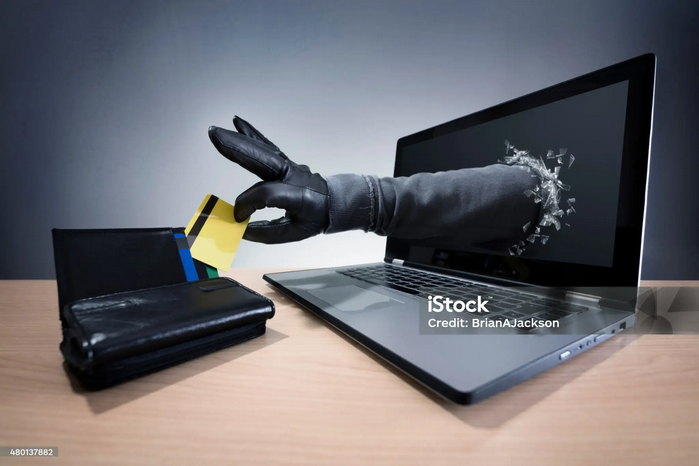

As Notícias Seguem o Seguinte Padrão:

```html
<div id="textoMateria">
    <h3>Todas matérias</h3>
    <ol class="list-unstyled lista-resultados">
        <li>
            <p>
                <span class="glyphicon glyphicon-list-alt"></span>
                <a href="/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero">
                    CDH apoia criação da Frente Mista de Combate à Violência Política de Gênero
                </a>
                <small class="text-muted">
                    13/12/2024 15h11
                </small>
            </p>
        </li>
    </ol>
</div>


In [7]:
# Localizando o bloco com o id "textoMateria"
bloco_noticias = soup.find("div", id="textoMateria")

bloco_noticias

<div id="textoMateria">
<h3>Todas matérias</h3>
<ol class="list-unstyled lista-resultados">
<li>
<p>
<span class="glyphicon glyphicon-list-alt"></span>
<a href="/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero">CDH apoia criação da Frente Mista de Combate à Violência Política de Gênero</a>
<small class="text-muted">
                                
                                    13/12/2024 15h11
                                
                            </small>
</p>
</li>
<li>
<p>
<span class="glyphicon glyphicon-volume-up"></span>
<a href="/noticias/audios/2024/12/pacheco-espera-fim-da-regulamentacao-da-reforma-tributaria-na-semana-que-vem">Pacheco espera fim da regulamentação da reforma tributária na semana que vem</a>
<small class="text-muted">
                                
                                    13/12/2024 14h22
                                
                            </small>
</p>
</li>
<li>
<p>
<

**O elemento \<div\> é uma tag HTML que representa uma divisão ou contêiner genérico dentro de uma página web.**

In [8]:
links = [a['href'] for a in bloco_noticias.find_all('a', href=True)]
        
# Exibindo os links extraídos
for link in links:
    print(link)

/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero
/noticias/audios/2024/12/pacheco-espera-fim-da-regulamentacao-da-reforma-tributaria-na-semana-que-vem
/noticias/videos/2024/12/corte-de-gastos-pacheco-defende-votacao-antes-do-recesso-e-pede-uniao-pelo-pais
/noticias/materias/2024/12/12/girao-critica-declaracoes-de-lewandowski-e-questiona-postura-do-stf
/noticias/materias/2024/12/12/zenaide-critica-reforma-tributaria-sem-justica-fiscal
/noticias/materias/2024/12/12/beto-faro-manifesta-apoio-a-regulamentacao-da-reforma-tributaria
/noticias/materias/2024/12/12/plenario-aprova-general-guido-naves-para-ministro-do-stm
/noticias/materias/2024/12/12/pacheco-celebra-posse-de-vital-do-rego-e-jorge-oliveira-no-tcu
/noticias/materias/2024/12/11/marcos-do-val-volta-a-criticar-decisoes-de-moraes-sobre-seu-mandato
/noticias/materias/2024/12/11/cleitinho-defende-cortes-de-privilegios-dos-tres-poderes
/noticias/audios/2024/12/ccj-aprova-indicados

**O que significa `'a', href=True`?**

- **`'a'`**: Refere-se à tag `<a>` em HTML, que é usada para criar links.
- **`href=True`**: Filtra apenas as tags `<a>` que possuem o atributo `href` definido, ou seja, que realmente apontam para algum link.

Essa combinação é utilizada para identificar e extrair apenas os links válidos dentro de uma página HTML.



## Acessando os bens

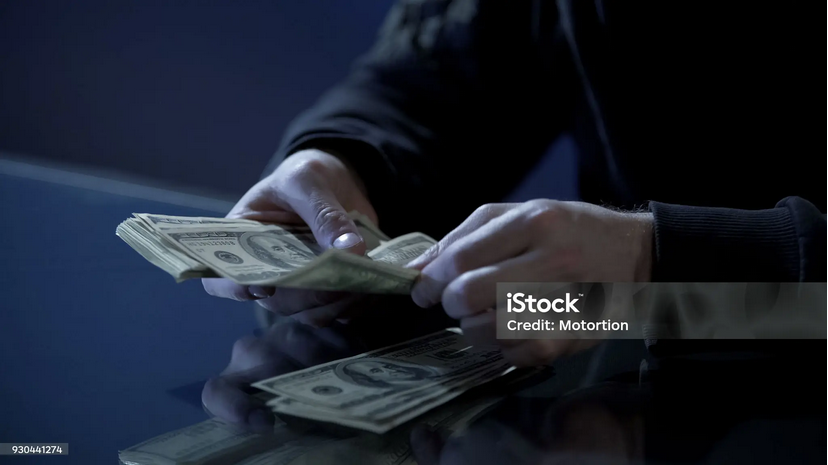


Conseguimos um pedaço do link para acessar as notícias, o link completo é algo da forma
https://www12.senado.leg.br + {link encontrado no passo anterior}

In [9]:
links = [link for link in links if "/noticias/materias" in link]

for link in links:
    print(link)

/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero
/noticias/materias/2024/12/12/girao-critica-declaracoes-de-lewandowski-e-questiona-postura-do-stf
/noticias/materias/2024/12/12/zenaide-critica-reforma-tributaria-sem-justica-fiscal
/noticias/materias/2024/12/12/beto-faro-manifesta-apoio-a-regulamentacao-da-reforma-tributaria
/noticias/materias/2024/12/12/plenario-aprova-general-guido-naves-para-ministro-do-stm
/noticias/materias/2024/12/12/pacheco-celebra-posse-de-vital-do-rego-e-jorge-oliveira-no-tcu
/noticias/materias/2024/12/11/marcos-do-val-volta-a-criticar-decisoes-de-moraes-sobre-seu-mandato
/noticias/materias/2024/12/11/cleitinho-defende-cortes-de-privilegios-dos-tres-poderes
/noticias/materias/2024/12/11/indicacao-de-general-para-ministro-do-stm-foi-aprovada-na-ccj
/noticias/materias/2024/12/11/apos-sabatina-ccj-envia-nomes-de-tres-indicados-ao-cnj-para-o-plenario
/noticias/materias/2024/12/10/pacheco-deseja-rapida-recuper

Vamos acessar as notícias agora!

In [10]:
base_url = "https://www12.senado.leg.br"

# Acessando cada link completo

full_url = base_url + links[0]  # Construindo a URL completa
response = requests.get(full_url, headers=headers)

In [11]:
full_url

'https://www12.senado.leg.br/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero'

In [12]:
soup = BeautifulSoup(response.text, "html.parser")

In [13]:
soup


<!DOCTYPE html>

<html lang="pt-br">
<head>
<link href="https://www12.senado.leg.br/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero" rel="canonical"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="Mulheres na Política, Violência" name="keywords"/>
<meta content="pt_BR" property="og:locale">
<meta content="Senado Federal" property="og:site_name">
<!-- HTML5 shim and Respond.js IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
      <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
      <script src="https://oss.maxcdn.com/libs/respond.js/1.3.0/respond.min.js"></script>
    <![endif]-->
<meta content="CDH apoia criação da Frente Mista de Combate à Violência Política de Gênero" property="og:title">
<meta content="A Comissão de Direitos Humanos (CDH) aprovou na quarta-feira (11) o projeto de criação da Frente Parlamentar Mista de Comba

### Informações interessantes

```html
<head>
    <link rel="canonical" href="https://www12.senado.leg.br/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero" />
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="keywords" content="Mulheres na Política, Violência">
    
    <meta property="og:locale" content="pt_BR" />
    <meta property="og:site_name" content="Senado Federal" />
    <!-- HTML5 shim and Respond.js IE8 support of HTML5 elements and media queries -->
    <!--[if lt IE 9]>
        <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
        <script src="https://oss.maxcdn.com/libs/respond.js/1.3.0/respond.min.js"></script>
    <![endif]-->

    <meta property="og:title" content="CDH apoia criação da Frente Mista de Combate à Violência Política de Gênero"/>
    <meta name="description" property="og:description" content="A Comissão de Direitos Humanos (CDH) aprovou na quarta-feira (11) o projeto de criação da Frente Parlamentar Mista de Combate à Violência Política de Gênero. O PRS 92/2023, da senadora Augusta Brito (PT-CE), recebeu parecer favorável do senador Weverton (PDT-MA) e agora segue para a Comissão Diretora do Senado."/>
    <meta property="og:url" content="https://www12.senado.leg.br/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero"/>
    <meta property="og:type" content="article"/>
    <meta property="article:publisher" content="150311598318037"/>
    <meta property="article:modified_time" content="2024-12-13T15:11:25-03:00"/>
    <meta name="sf_data" property="article:published_time" content="2024-12-13T15:11:25-03:00"/>
    <meta name="twitter:card" content="summary_large_image"/>
    <meta name="twitter:title" content="CDH apoia criação da Frente Mista de Combate à Violência Política de Gênero"/>
    <meta name="twitter:description" content="A Comissão de Direitos Humanos (CDH) aprovou na quarta-feira (11) o projeto de criação da Frente Parlamentar Mista de Combate à Violência Política de Gênero. O PRS 92/2023, da senadora Augusta Brito (PT-CE), recebeu parecer favorável do senador Weverton (PDT-MA) e agora segue para a Comissão Diretora do Senado."/>
    <meta name="sf_indexacao" property="article:tag" content="Mulheres na Política"/>
    <meta name="sf_indexacao" property="article:tag" content="Violência"/>
    <meta property="og:image" content="https://www12.senado.leg.br/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero/20241211_01344sc.jpg"/>
    <meta name="twitter:image" content="https://www12.senado.leg.br/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero/20241211_01344sc.jpg"/>
</head>


In [14]:
soup = BeautifulSoup(response.text, "html.parser")

In [15]:
print(soup.get_text(separator="\n").strip())

CDH apoia criação da Frente Mista de Combate à Violência Política de Gênero — Senado Notícias






























































Ir para conteúdo principal


















 Menu


























Acessibilidade


Fale com o Senado








Fale com o Senado




























Buscar










Clique para receber notícias do Senado em seu Whatsapp








Facebook do Senado Federal








Twitter do Senado Federal








Canal Youtube da TV Senado








Flickr da Agência Senado








Instagram do Senado Federal








Senado Federal no Telegram








Linkedin do Senado Federal










Buscar








Buscar




















MENU DESTA SEÇÃO








Especiais




Reportagens


Arquivo S


Web Stories


Grandes coberturas


Acervo






Fotos




Banco de imagens


Galerias






Serviços




Senado Multimídia


Notificações


Newsletter






Saiba Mais




Glossário legislativo


Entenda o assunto


Manual de Comunicação






Ex

In [16]:
# Extraindo o título
title = soup.find("meta", property="og:title")["content"]

# Extraindo a descrição
description = soup.find("meta", attrs={"name": "description"})["content"]

# Extraindo as indexações (tags)
tags = [tag["content"] for tag in soup.find_all("meta", attrs={"name": "sf_indexacao"})]

date = soup.find("meta", property="article:modified_time")["content"]

# Exibindo os resultados
print("Título:", title)
print("Descrição:", description)
print("Indexações:", tags)
print("Data:", date)

Título: CDH apoia criação da Frente Mista de Combate à Violência Política de Gênero
Descrição: A Comissão de Direitos Humanos (CDH) aprovou na quarta-feira (11) o projeto de criação da Frente Parlamentar Mista de Combate à Violência Política de Gênero. O  PRS 92/2023 , da senadora Augusta Brito (PT-CE), recebeu parecer favorável do senador Weverton (PDT-MA) e agora segue para a Comissão Diretora do Senado.
Indexações: ['Mulheres na Política', 'Violência']
Data: 2024-12-13T15:11:25-03:00


In [17]:
# Localizando o bloco de texto
texto_materia = soup.find("div", id="textoMateria")

# Extraindo e limpando o texto
texto = texto_materia.get_text(separator="\n").strip()

In [18]:
texto

'A Comissão de Direitos Humanos (CDH) aprovou na quarta-feira (11) o projeto de criação da Frente Parlamentar Mista de Combate à Violência Política de Gênero. O \nPRS 92/2023\n, da senadora Augusta Brito (PT-CE), recebeu parecer favorável do senador Weverton (PDT-MA) e agora segue para a Comissão Diretora do Senado.\n\n\nA violência política de gênero pode ser caracterizada como um ato com o objetivo de excluir a mulher do espaço político, impedir ou restringir seu acesso, ou induzi-la a tomar decisões contrárias à sua vontade. As mulheres podem sofrer violência ao concorrer, já eleitas ou durante o mandato. Esse tipo de violência é considerado uma das causas da sub-representação das mulheres no Parlamento e nos espaços de poder e decisão, além de prejudicar a democracia no país.\n\n\nO crime de violência política de gênero foi tipificado pela \nLei 14.192, de 2021\n. No entanto, o Monitor da Violência Política de Gênero e Raça revela que, desde então, das 175 representações de violênc

In [19]:
informacoes = {
    "titulo": title,
    "descricao": description,
    "tags": tags,
    "texto": texto,
    "data": date,
}

In [20]:
informacoes

{'titulo': 'CDH apoia criação da Frente Mista de Combate à Violência Política de Gênero',
 'descricao': 'A Comissão de Direitos Humanos (CDH) aprovou na quarta-feira (11) o projeto de criação da Frente Parlamentar Mista de Combate à Violência Política de Gênero. O  PRS 92/2023 , da senadora Augusta Brito (PT-CE), recebeu parecer favorável do senador Weverton (PDT-MA) e agora segue para a Comissão Diretora do Senado.',
 'tags': ['Mulheres na Política', 'Violência'],
 'texto': 'A Comissão de Direitos Humanos (CDH) aprovou na quarta-feira (11) o projeto de criação da Frente Parlamentar Mista de Combate à Violência Política de Gênero. O \nPRS 92/2023\n, da senadora Augusta Brito (PT-CE), recebeu parecer favorável do senador Weverton (PDT-MA) e agora segue para a Comissão Diretora do Senado.\n\n\nA violência política de gênero pode ser caracterizada como um ato com o objetivo de excluir a mulher do espaço político, impedir ou restringir seu acesso, ou induzi-la a tomar decisões contrárias à

## PERDEU!!!

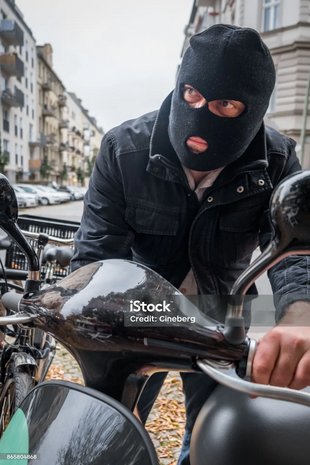

Agora vamos ~~roubar~~ extrair o máximo de coisas que conseguirmos sem deixar (muitas) evidências.

In [21]:
import time
import random

In [22]:
numero_paginas = 10 

links_noticias = []

for p in range(numero_paginas):
    url = f"https://www12.senado.leg.br/noticias/temas/politica/pagina/{p}"
    response = requests.get(url, headers=headers)

    print(response)
    
    soup = BeautifulSoup(response.text, "html.parser")
    bloco_noticias = soup.find("div", id="textoMateria")

    links = [a['href'] for a in bloco_noticias.find_all('a', href=True)]
    links = [link for link in links if "/noticias/materias" in link]

    links_noticias += links

    # Esperar alguns segundos antes de ir para a próxima página
    tempo_espera = random.uniform(0, .5)
    time.sleep(tempo_espera)


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [23]:
links_noticias

['/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero',
 '/noticias/materias/2024/12/12/girao-critica-declaracoes-de-lewandowski-e-questiona-postura-do-stf',
 '/noticias/materias/2024/12/12/zenaide-critica-reforma-tributaria-sem-justica-fiscal',
 '/noticias/materias/2024/12/12/beto-faro-manifesta-apoio-a-regulamentacao-da-reforma-tributaria',
 '/noticias/materias/2024/12/12/plenario-aprova-general-guido-naves-para-ministro-do-stm',
 '/noticias/materias/2024/12/12/pacheco-celebra-posse-de-vital-do-rego-e-jorge-oliveira-no-tcu',
 '/noticias/materias/2024/12/11/marcos-do-val-volta-a-criticar-decisoes-de-moraes-sobre-seu-mandato',
 '/noticias/materias/2024/12/11/cleitinho-defende-cortes-de-privilegios-dos-tres-poderes',
 '/noticias/materias/2024/12/11/indicacao-de-general-para-ministro-do-stm-foi-aprovada-na-ccj',
 '/noticias/materias/2024/12/11/apos-sabatina-ccj-envia-nomes-de-tres-indicados-ao-cnj-para-o-plenario',
 '/noticias/materia

In [24]:
import json
import pathlib

data_dir = pathlib.Path("data")  # Diretório onde os arquivos serão salvos
data_dir.mkdir(exist_ok=True) 

for i, link in enumerate(links_noticias):
    base_url = "https://www12.senado.leg.br"

    full_url = base_url + link  # Construindo a URL completa
    response = requests.get(full_url, headers=headers)

    soup = BeautifulSoup(response.text, "html.parser")

    title = soup.find("meta", property="og:title")["content"]
    description = soup.find("meta", attrs={"name": "description"})["content"]
    tags = [tag["content"] for tag in soup.find_all("meta", attrs={"name": "sf_indexacao"})]
    date = soup.find("meta", property="article:modified_time")["content"]
    
    texto_materia = soup.find("div", id="textoMateria")
    texto = texto_materia.get_text(separator="\n").strip()

    informacoes = {
        "url": full_url,
        "titulo": title,
        "descricao": description,
        "tags": tags,
        "texto": texto,
        "data": date,
    }
    
    filename = f"noticia_{i}"
    
    file_path = data_dir / filename

    with file_path.open("w", encoding="utf-8") as f:
        json.dump(informacoes, f, ensure_ascii=False, indent=4)
    
    print(f"Arquivo salvo: {file_path}")
    tempo_espera = random.uniform(0, .5)
    time.sleep(tempo_espera)  

Arquivo salvo: data/noticia_0
Arquivo salvo: data/noticia_1
Arquivo salvo: data/noticia_2
Arquivo salvo: data/noticia_3
Arquivo salvo: data/noticia_4
Arquivo salvo: data/noticia_5
Arquivo salvo: data/noticia_6
Arquivo salvo: data/noticia_7
Arquivo salvo: data/noticia_8
Arquivo salvo: data/noticia_9
Arquivo salvo: data/noticia_10
Arquivo salvo: data/noticia_11
Arquivo salvo: data/noticia_12
Arquivo salvo: data/noticia_13
Arquivo salvo: data/noticia_14
Arquivo salvo: data/noticia_15
Arquivo salvo: data/noticia_16
Arquivo salvo: data/noticia_17
Arquivo salvo: data/noticia_18
Arquivo salvo: data/noticia_19
Arquivo salvo: data/noticia_20
Arquivo salvo: data/noticia_21
Arquivo salvo: data/noticia_22
Arquivo salvo: data/noticia_23
Arquivo salvo: data/noticia_24
Arquivo salvo: data/noticia_25
Arquivo salvo: data/noticia_26
Arquivo salvo: data/noticia_27
Arquivo salvo: data/noticia_28
Arquivo salvo: data/noticia_29
Arquivo salvo: data/noticia_30
Arquivo salvo: data/noticia_31
Arquivo salvo: dat

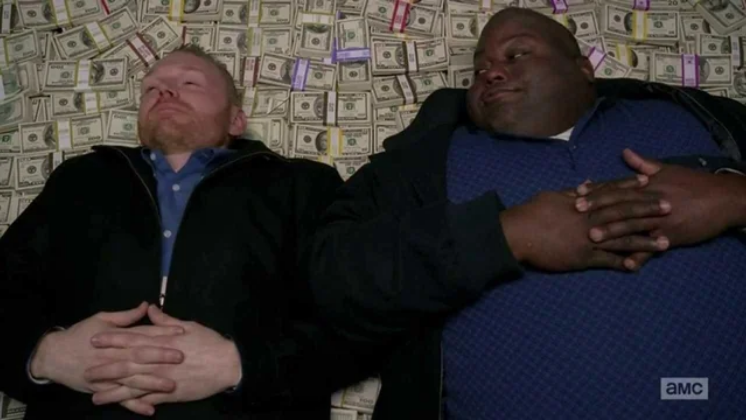

## Pequena análise d